# Linear Regression with PyTorch on GPU with Stochastic Gradient Descent

## Package imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

# variable has 'cuda' or 'cpu' in it
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [2]:
# from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# from IPython.core.debugger import set_trace

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# The Problem

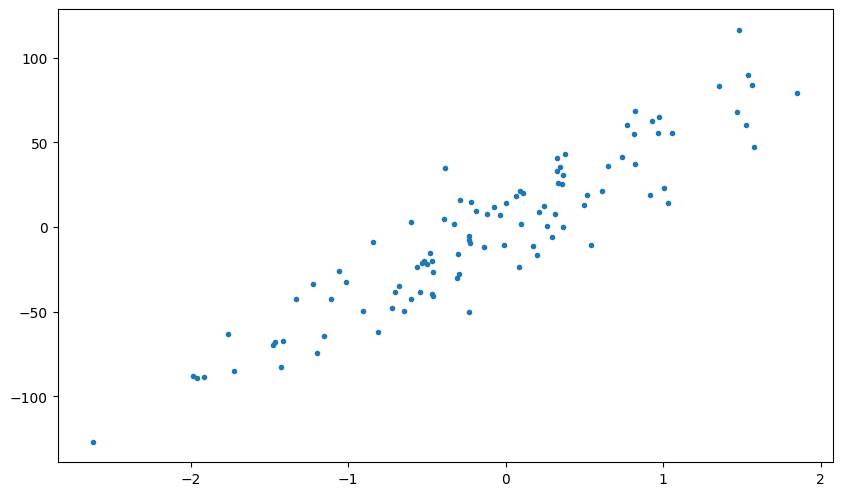

In [3]:
from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

x, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(x, y, ".")

In [4]:
y.shape

(100,)

# The Solution

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [6]:
y.shape

torch.Size([100, 1])

In [7]:
# class to create our Linear regression model
class LinReg(nn.Module): # define our model as subclass of nn.Module
    def __init__(self, input_dim):
        super().__init__() # super() lets you avoid referring to the base class 
                           # explicitly. For additional advantages in case of 
                           # multiple inheritance, refer docs
        self.beta = nn.Linear(input_dim, 1) # beta is just a parameter
                                            # Linear layer with one i/p, o/p dim
                                            # automatically a bias added, can remove
        
    def forward(self, x): # gets data -> passes through linear layer
        return self.beta(x)

# or just
# model = nn.Linear(input_dim, 1)

In [8]:
DEVICE # checking here, otherwise can assert

device(type='cuda', index=0)

In [9]:
model = LinReg(n_features).to(DEVICE)  # <-- here, move model to GPU. Why? Para. opt.
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1) # passing all parameters, partial possible, diff. lr

x, y = x.to(DEVICE), y.to(DEVICE)  # <-- here, move data to GPU. Why? Calc. on GPU

In [10]:
model.beta.weight

Parameter containing:
tensor([[-0.0625]], device='cuda:0', requires_grad=True)

In [11]:
model.beta.bias

Parameter containing:
tensor([-0.2417], device='cuda:0', requires_grad=True)

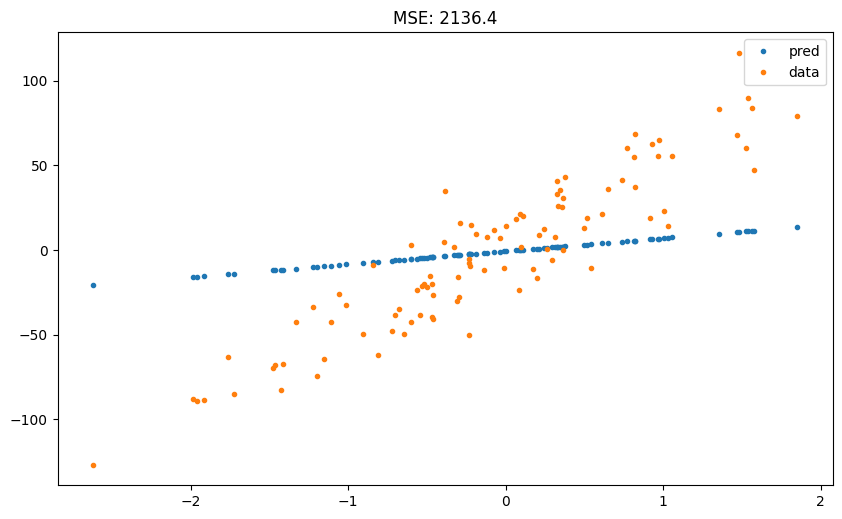

In [12]:
# Training step
model.train()  # <-- here, set the model in train mode (dropout)
optimizer.zero_grad() # nulls gradient, otherwise accumulates

y_ = model(x) # pass data through model and get prediction
loss = loss_fn(y_, y)

loss.backward() # backward pass
optimizer.step() # updates parameters of our model

# Ideally, data below is for validation
model.eval()  # <-- here, set the model in eval mode
with torch.no_grad(): # not interested in gradients
    y_ = model(x)    
    
# Vizualize
fig, ax = plt.subplots()
ax.plot(x.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(x.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

In [13]:
def torch2np(x):
  return x.detach().cpu().numpy()

# Try on your own:
- Write a proper training loop for this linear regression example.
- Split data into training and validation sets, and perform both.
- Use the Dataset and DataLoader abstraction.
- Create a Multi Layer Perceptron (MLP).